# Probability and Statistics for Machine Learning

> **"Probability is the very guide of life."** - Cicero

## Learning Objectives
- Understand fundamental probability concepts
- Master statistical distributions and their properties
- Learn hypothesis testing and confidence intervals
- Apply statistical methods to machine learning problems
- Build intuition for uncertainty in data


## 1. Basic Probability Concepts

### Sample Space and Events
- **Sample Space (Ω)**: The set of all possible outcomes
- **Event**: A subset of the sample space
- **Probability**: A measure of how likely an event is to occur

### Probability Rules
1. **Non-negativity**: P(A) ≥ 0 for any event A
2. **Normalization**: P(Ω) = 1
3. **Additivity**: P(A ∪ B) = P(A) + P(B) for mutually exclusive events


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Example: Rolling a fair die
sample_space = [1, 2, 3, 4, 5, 6]
print(f"Sample space: {sample_space}")

# Probability of rolling an even number
even_numbers = [2, 4, 6]
p_even = len(even_numbers) / len(sample_space)
print(f"Probability of rolling an even number: {p_even}")

# Probability of rolling a number greater than 4
greater_than_4 = [5, 6]
p_greater_than_4 = len(greater_than_4) / len(sample_space)
print(f"Probability of rolling > 4: {p_greater_than_4}")

# Probability of rolling an even number OR > 4 (using inclusion-exclusion)
p_even_or_greater = p_even + p_greater_than_4 - (1/6)  # subtract overlap (6)
print(f"Probability of even OR > 4: {p_even_or_greater}")


Sample space: [1, 2, 3, 4, 5, 6]
Probability of rolling an even number: 0.5
Probability of rolling > 4: 0.3333333333333333
Probability of even OR > 4: 0.6666666666666666


## 2. Conditional Probability and Bayes' Theorem

### Conditional Probability
P(A|B) = P(A ∩ B) / P(B)

### Bayes' Theorem
P(A|B) = P(B|A) × P(A) / P(B)

This is fundamental in machine learning for:
- Naive Bayes classification
- Bayesian inference
- Updating beliefs with new evidence


Probability of disease given positive test: 0.088
This means only 8.8% of positive tests are true positives!


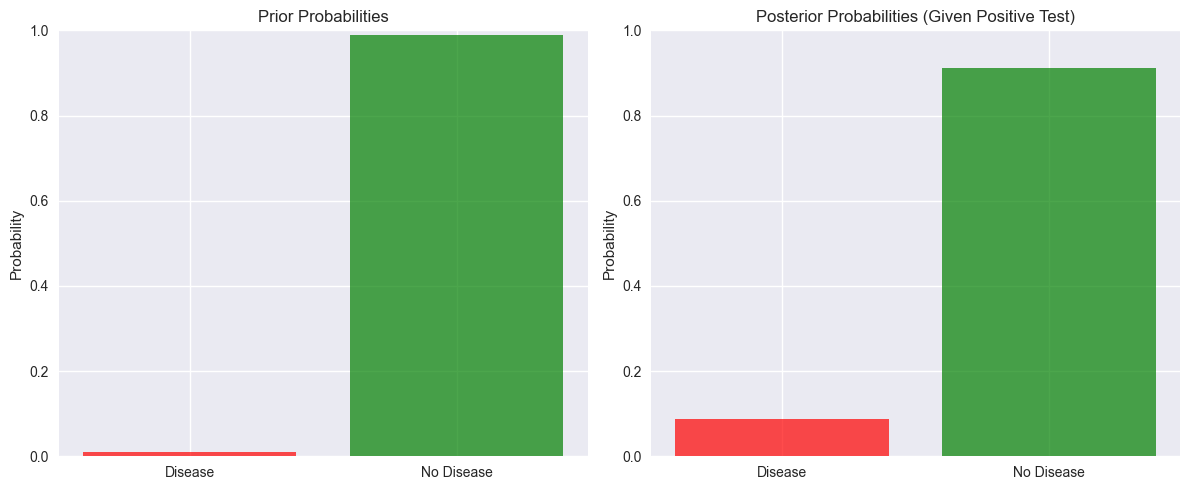

In [3]:
# Example: Medical Test (Bayes' Theorem)
# Disease prevalence: 1% of population
p_disease = 0.01
p_no_disease = 0.99

# Test accuracy: 95% sensitivity, 90% specificity
p_positive_given_disease = 0.95  # sensitivity
p_negative_given_no_disease = 0.90  # specificity
p_positive_given_no_disease = 1 - p_negative_given_no_disease

# Calculate probability of disease given positive test
p_positive = p_positive_given_disease * p_disease + p_positive_given_no_disease * p_no_disease
p_disease_given_positive = (p_positive_given_disease * p_disease) / p_positive

print(f"Probability of disease given positive test: {p_disease_given_positive:.3f}")
print(f"This means only {p_disease_given_positive*100:.1f}% of positive tests are true positives!")

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Prior probabilities
ax1.bar(['Disease', 'No Disease'], [p_disease, p_no_disease], color=['red', 'green'], alpha=0.7)
ax1.set_title('Prior Probabilities')
ax1.set_ylabel('Probability')
ax1.set_ylim(0, 1)

# Posterior probabilities
posterior_disease = p_disease_given_positive
posterior_no_disease = 1 - posterior_disease
ax2.bar(['Disease', 'No Disease'], [posterior_disease, posterior_no_disease], 
        color=['red', 'green'], alpha=0.7)
ax2.set_title('Posterior Probabilities (Given Positive Test)')
ax2.set_ylabel('Probability')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()


## 3. Statistical Distributions

### Normal Distribution
The most important distribution in statistics and machine learning.

**Probability Density Function:**
$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$

Where:
- μ: mean
- σ: standard deviation


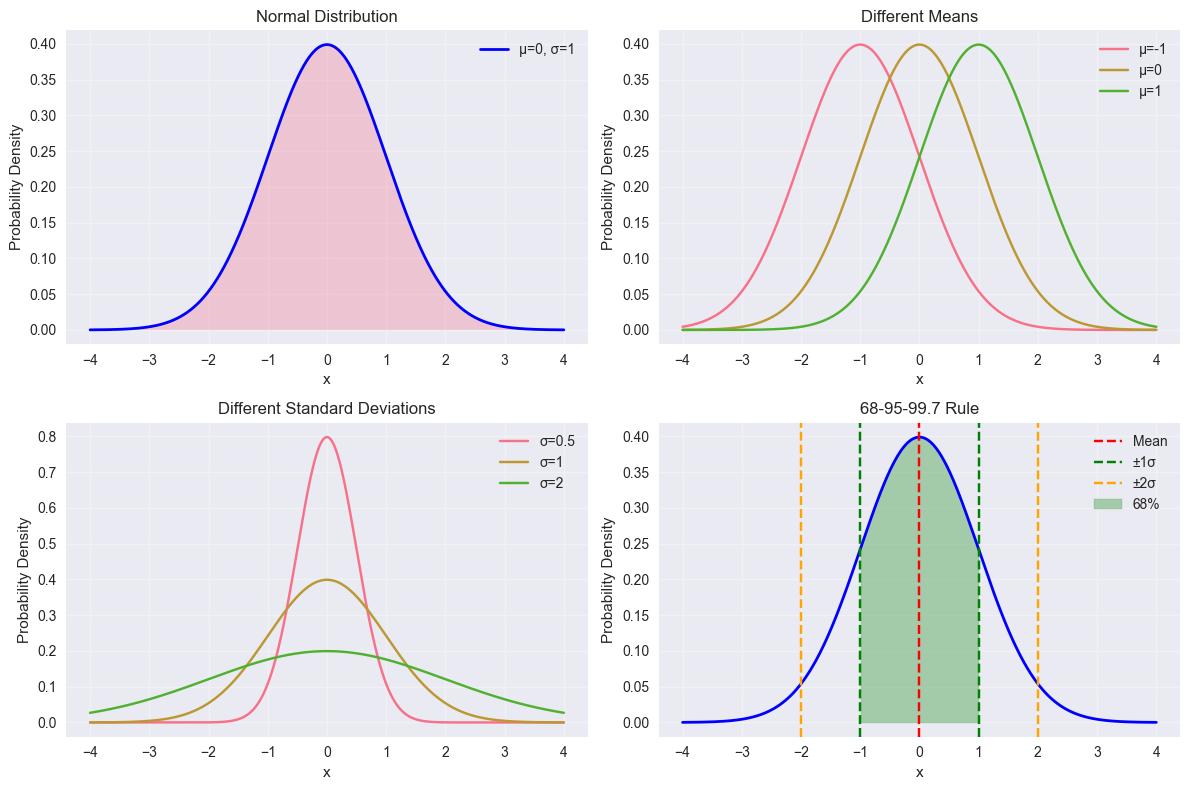

Normal Distribution Probabilities:
P(-1 < X < 1) = 0.683 (should be ~0.683)
P(-2 < X < 2) = 0.954 (should be ~0.954)
P(-3 < X < 3) = 0.997 (should be ~0.997)


In [4]:
# Normal distribution visualization
from scipy.stats import norm

# Parameters
mu = 0
sigma = 1
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)

# Plot normal distribution
plt.figure(figsize=(12, 8))

# Main plot
plt.subplot(2, 2, 1)
plt.plot(x, y, 'b-', linewidth=2, label=f'μ={mu}, σ={sigma}')
plt.fill_between(x, y, alpha=0.3)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Different means
plt.subplot(2, 2, 2)
for mu_val in [-1, 0, 1]:
    y_val = norm.pdf(x, mu_val, 1)
    plt.plot(x, y_val, label=f'μ={mu_val}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Different Means')
plt.legend()
plt.grid(True, alpha=0.3)

# Different standard deviations
plt.subplot(2, 2, 3)
for sigma_val in [0.5, 1, 2]:
    y_val = norm.pdf(x, 0, sigma_val)
    plt.plot(x, y_val, label=f'σ={sigma_val}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Different Standard Deviations')
plt.legend()
plt.grid(True, alpha=0.3)

# 68-95-99.7 rule
plt.subplot(2, 2, 4)
plt.plot(x, y, 'b-', linewidth=2)
plt.axvline(mu, color='r', linestyle='--', label='Mean')
plt.axvline(mu + sigma, color='g', linestyle='--', label='±1σ')
plt.axvline(mu - sigma, color='g', linestyle='--')
plt.axvline(mu + 2*sigma, color='orange', linestyle='--', label='±2σ')
plt.axvline(mu - 2*sigma, color='orange', linestyle='--')
plt.fill_between(x[(x >= mu-sigma) & (x <= mu+sigma)], 
                 y[(x >= mu-sigma) & (x <= mu+sigma)], 
                 alpha=0.3, color='green', label='68%')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('68-95-99.7 Rule')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate probabilities
print("Normal Distribution Probabilities:")
print(f"P(-1 < X < 1) = {norm.cdf(1) - norm.cdf(-1):.3f} (should be ~0.683)")
print(f"P(-2 < X < 2) = {norm.cdf(2) - norm.cdf(-2):.3f} (should be ~0.954)")
print(f"P(-3 < X < 3) = {norm.cdf(3) - norm.cdf(-3):.3f} (should be ~0.997)")
